# Building a Project with the ChatGPT API

## 02_06 - Customize a model using Fine Tuning

### Install the necessary libraries. 

In [ ]:
pip install openai

In [ ]:
pip install openai[datalib]

In [ ]:
pip install urllib3==1.26.6 

In [ ]:
pip install python-dotenv

### Import the libraries and environment file to gain access to the Open API Key
#### The key can be generated here: https://platform.openai.com/account/api-keys

In [1]:
import os
from openai import OpenAI

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

### Authenticate to the API using the API Key
#### Pull from environment variables or use api_key = ("your_key_here") to hardcode the key

In [2]:
client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY']  
)

### Generate Data

### In the real world, you’ll have your data already. In this example, I'm generating synthetic data to walk through the fine-tuning process

In [15]:
import pandas as pd
import random

# lists to hold the random prompt values
locations = ['the moon', 'a space ship', 'in outer space']
alien_types = ["Grey","Reptilian","Nordic","Shape shifting"]
hero_goals = ["save the Earth", "destroy the alien home planet", "save the human race"]

# prompt template to be completed using values from the lists above
prompt = ''' Imagine the plot for a new science fiction movie. The location is {location}. Humans
               are fighting the {alien_type} aliens. The hero of the movie intends to {hero_goal}. 
               Write the movie plot in 50 words or less. '''

sub_prompt = "{location}, {alien_type}, {hero_goal}"

df = pd.DataFrame()

# To fine-tune a model, you are required to provide at least 10 examples. 
# You'll see improvements from fine-tuning on 50 to 100 training examples 
for i in range(100): 
    
    # retrieve random numbers based on the length of the lists
    location = random.randint(0,len(locations)-1)
    alien_type = random.randint(0,len(alien_types)-1)
    hero_goal = random.randint(0,len(hero_goals)-1)
    
    # use the prompt template and fill in the values
    model_prompt = prompt.format(location=locations[location], alien_type=alien_types[alien_type], 
                           hero_goal=hero_goals[hero_goal])
    
    # track the values used to fill in the template
    model_sub_prompt = sub_prompt.format(location=locations[location], alien_type=alien_types[alien_type], 
                           hero_goal=hero_goals[hero_goal])

    # retrieve a model generated movie plot based on the input prompt
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
           {"role": "system", "content": '''You help write movie scripts.'''},
           {"role": "user", "content": model_prompt}
        ],
        temperature=1,
        max_tokens=500,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    
    # retrieve the finish reason for the model
    finish_reason = response.choices[0].finish_reason
    
    # retrieve the response 
    response_txt = response.choices[0].message.content
    
    # add response, prompt, etc. to a DataFrame
    new_row = {
        'location'
        'alien_type'
        'hero_goal'
        'prompt':model_prompt, 
        'sub_prompt':model_sub_prompt, 
        'response_txt':response_txt, 
        'finish_reason':finish_reason}
    
    new_row = pd.DataFrame([new_row])
    
    df = pd.concat([df, new_row], axis=0, ignore_index=True)

#save DataFrame to a CSV 
df.to_csv("science_fiction_plots.csv")

### Read CSV into a DataFrame

In [16]:
df = pd.read_csv("science_fiction_plots.csv")

df

,Unnamed: 0,locationalien_typehero_goalprompt,sub_prompt,response_txt,finish_reason
0,0,Imagine the plot for a new science fiction mo...,"a space ship, Grey, save the Earth",\n\nThe space ship is in danger. Earth is bein...,stop
1,1,Imagine the plot for a new science fiction mo...,"a space ship, Shape shifting, save the Earth",\n\nThe crew of a space ship find themselves i...,stop
2,2,Imagine the plot for a new science fiction mo...,"the moon, Nordic, save the human race",\n\nThe movie follows a brave human astronaut ...,stop
3,3,Imagine the plot for a new science fiction mo...,"the moon, Shape shifting, save the Earth",\n\nThe world is under attack from the shape-s...,stop
4,4,Imagine the plot for a new science fiction mo...,"a space ship, Grey, save the Earth",\n\nThe crew of a space ship is sent on a miss...,stop
...,...,...,...,...,...
95,95,Imagine the plot for a new science fiction mo...,"the moon, Nordic, save the human race","\n\nOn the moon, humanity is fighting a losing...",stop
96,96,Imagine the plot for a new science fiction mo...,"in outer space, Nordic, save the human race",\n\nA team of brave humans led by an unlikely ...,stop
97,97,Imagine the plot for a new science fiction mo...,"the moon, Nordic, destroy the alien home planet",\n\nWhen a Nordic alien invades the moon and c...,stop
98,98,Imagine the plot for a new science fiction mo...,"a space ship, Reptilian, destroy the alien hom...","\n\nAfter generations of fighting, the humans ...",stop


In [17]:
# remove special characters from the response
df['response_txt'] = df['response_txt'].str.replace('\n', '', regex=True)
df

,Unnamed: 0,locationalien_typehero_goalprompt,sub_prompt,response_txt,finish_reason
0,0,Imagine the plot for a new science fiction mo...,"a space ship, Grey, save the Earth",The space ship is in danger. Earth is being at...,stop
1,1,Imagine the plot for a new science fiction mo...,"a space ship, Shape shifting, save the Earth",The crew of a space ship find themselves in a ...,stop
2,2,Imagine the plot for a new science fiction mo...,"the moon, Nordic, save the human race",The movie follows a brave human astronaut and ...,stop
3,3,Imagine the plot for a new science fiction mo...,"the moon, Shape shifting, save the Earth",The world is under attack from the shape-shift...,stop
4,4,Imagine the plot for a new science fiction mo...,"a space ship, Grey, save the Earth",The crew of a space ship is sent on a mission ...,stop
...,...,...,...,...,...
95,95,Imagine the plot for a new science fiction mo...,"the moon, Nordic, save the human race","On the moon, humanity is fighting a losing bat...",stop
96,96,Imagine the plot for a new science fiction mo...,"in outer space, Nordic, save the human race",A team of brave humans led by an unlikely hero...,stop
97,97,Imagine the plot for a new science fiction mo...,"the moon, Nordic, destroy the alien home planet",When a Nordic alien invades the moon and captu...,stop
98,98,Imagine the plot for a new science fiction mo...,"a space ship, Reptilian, destroy the alien hom...","After generations of fighting, the humans have...",stop


#### To perform fine-tuning, it is necessary to provide GPT with examples of what the user might type and the corresponding desired response. The sub_prompt column contains the exampls of input and response_txt contains a sample of a desired response. 

In [18]:
# retrieve only the sub_prompt and response_txt columns from the DataFrame into a new DataFrame
training_data = df.loc[:,['sub_prompt','response_txt']] 

# rename columns sub_prompt->prompt and response_txt->completion
training_data.rename(columns={'sub_prompt':'prompt', 'response_txt':'completion'}, inplace=True) 

# convert DataFrame to CSV file
training_data.to_csv('training_data.csv',index=False)

In [19]:
training_data

,prompt,completion
0,"a space ship, Grey, save the Earth",The space ship is in danger. Earth is being at...
1,"a space ship, Shape shifting, save the Earth",The crew of a space ship find themselves in a ...
2,"the moon, Nordic, save the human race",The movie follows a brave human astronaut and ...
3,"the moon, Shape shifting, save the Earth",The world is under attack from the shape-shift...
4,"a space ship, Grey, save the Earth",The crew of a space ship is sent on a mission ...
...,...,...
95,"the moon, Nordic, save the human race","On the moon, humanity is fighting a losing bat..."
96,"in outer space, Nordic, save the human race",A team of brave humans led by an unlikely hero...
97,"the moon, Nordic, destroy the alien home planet",When a Nordic alien invades the moon and captu...
98,"a space ship, Reptilian, destroy the alien hom...","After generations of fighting, the humans have..."


## Prepare data using OpenAI's CLI data preparation tool

### Execute via a Terminal window -- not in this Jupter notebook due to Y/N prompts

#### The data must be a JSONL document, where each line is a prompt-completion pair corresponding to a training example. OpenAI's CLI data preparation tool can be used to convert the CSV data into the required format.

<b>Steps</b>
<hr>
1.) Go to a Terminal window <br>
2.) Change to the directory where your Jupyter Notebook files are stored <br>
3.) Type the command: <i>openai tools fine_tunes.prepare_data -f training_data.csv</i> <br>
4.) Type 'Y' to all prompts <br>
5.) Come back to the Jupyter Notebook and execute the code in the next cell. <br>

<b>See example Terminal window output below.</b>

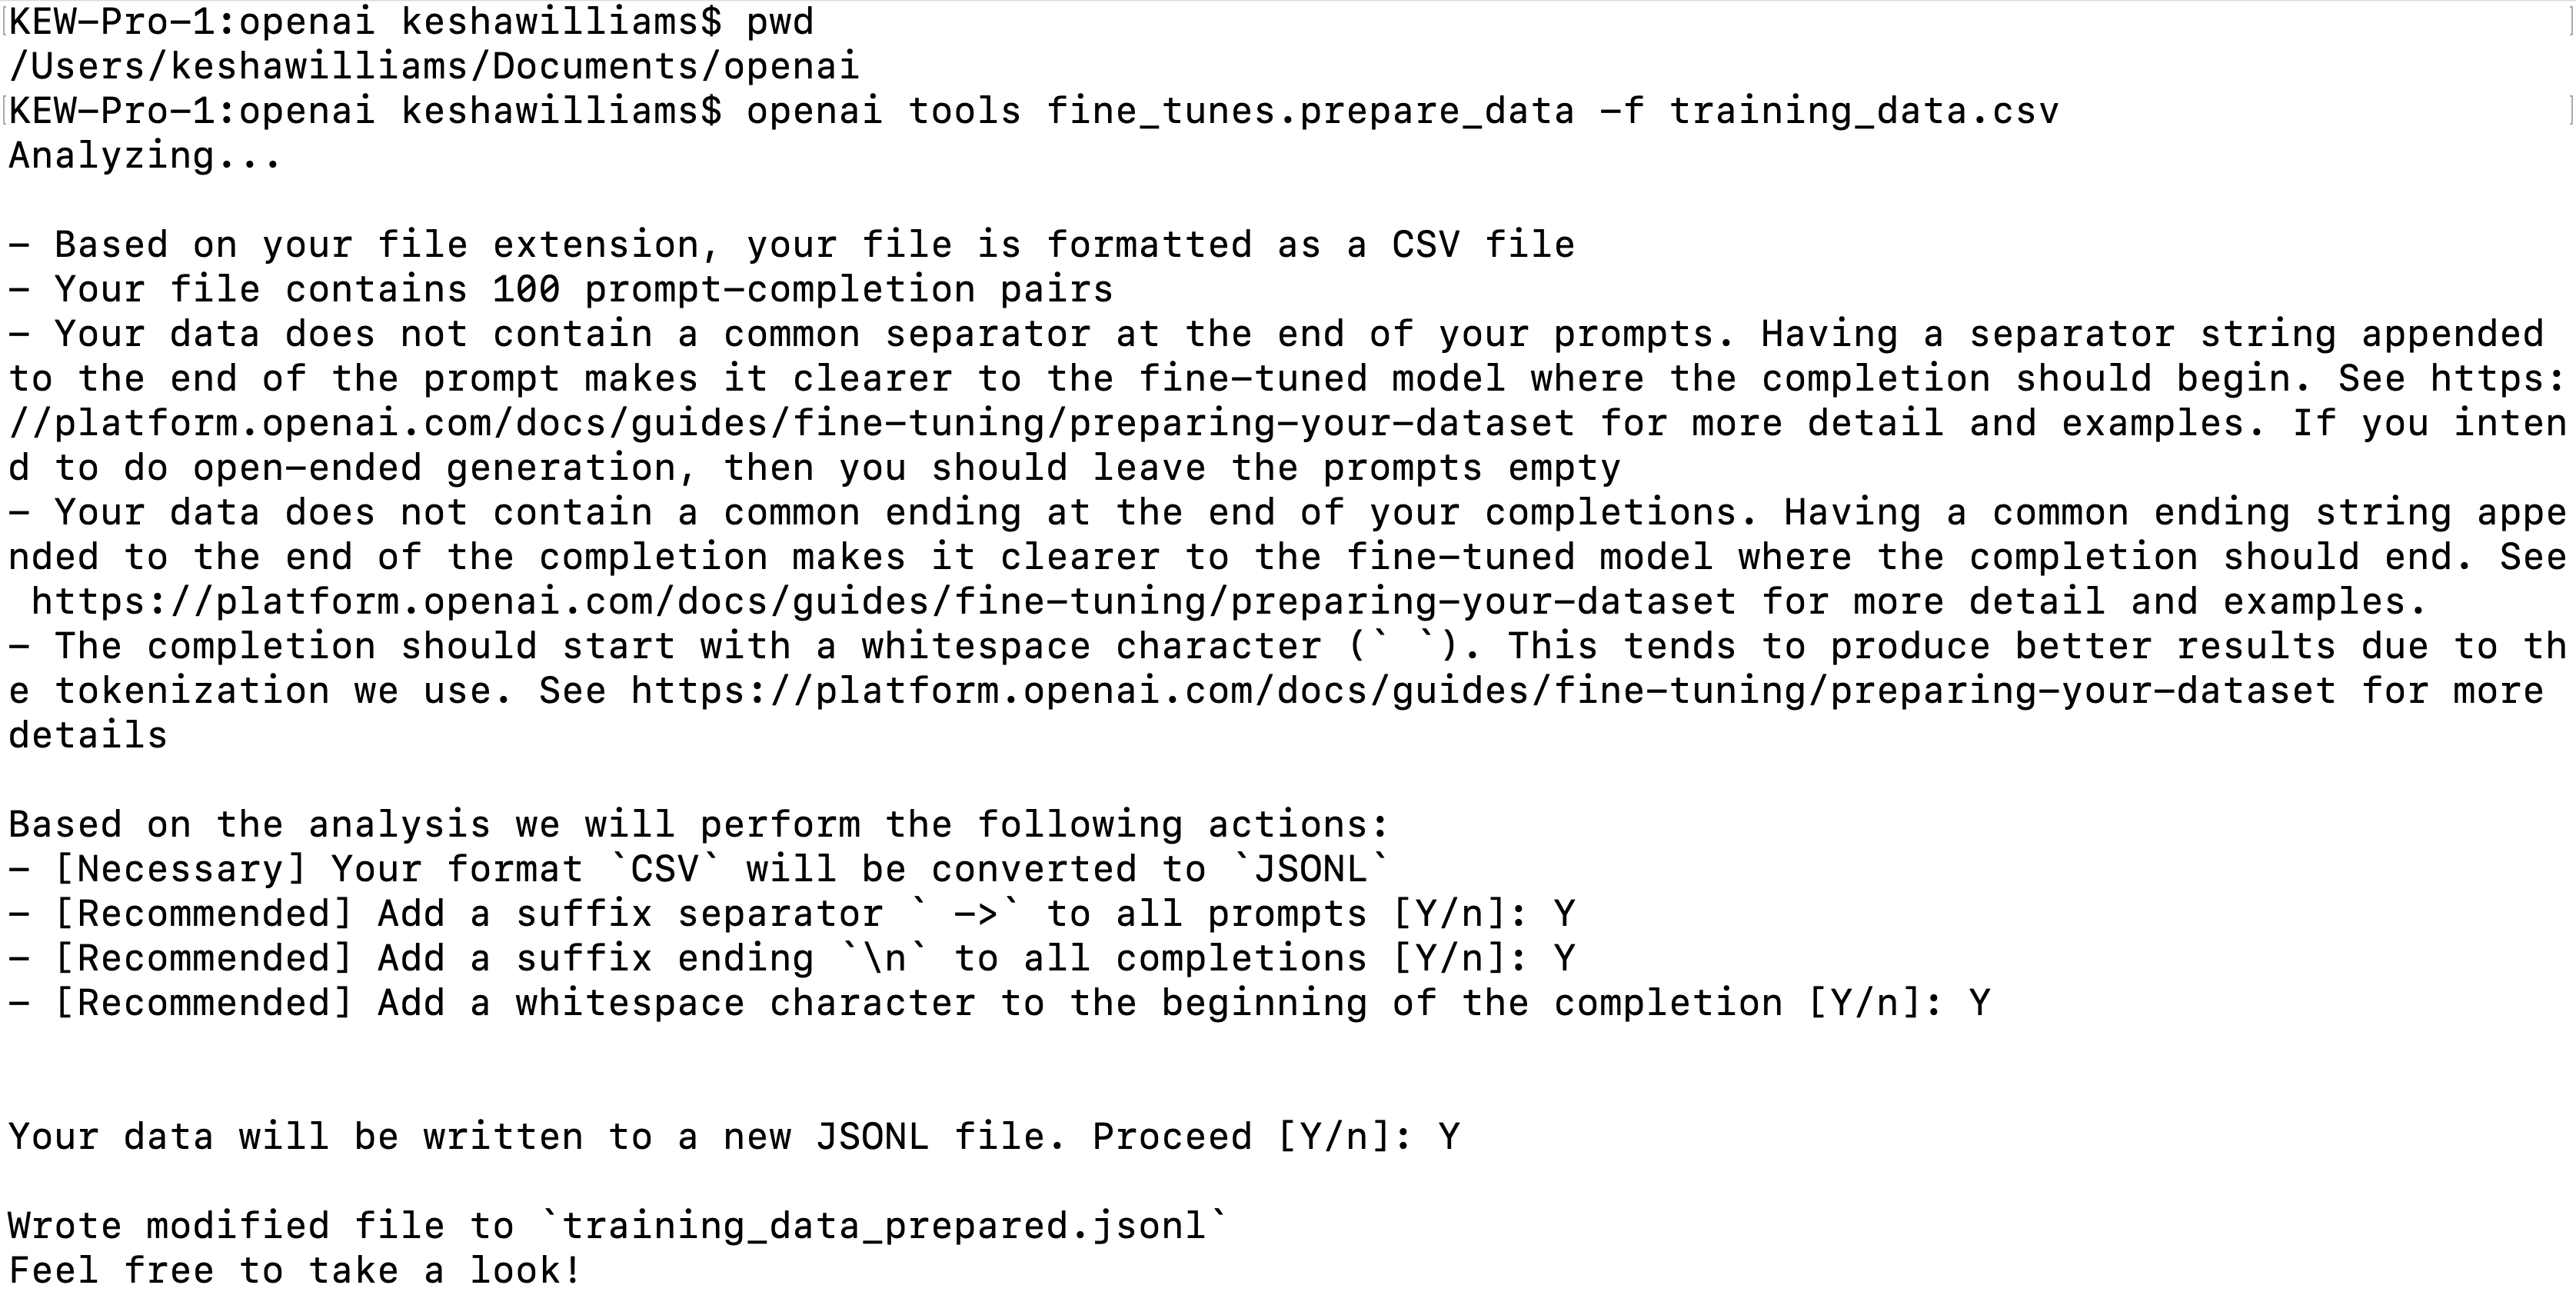

### Create fine-tuned model
The fine-tuning of the GPT-3 model is executed. In a few minutes, the fine-tuned model is ready to use

In [12]:
# Once you have the data validated, the file needs to be uploaded using the 
# Files API in order to be used with a fine-tuning jobs

client.files.create(
  file=open("training_data_prepared.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-AG9BtuDOnsOVyMidfQrPjzBx', bytes=45650, created_at=1699793637, filename='training_data_prepared.jsonl', object='file', purpose='fine-tune', status='uploaded', status_details=None)

In [20]:
# Start the fine-tuning job 
# After you've started a fine-tuning job, it may take some time to complete. Your job may be queued 
# behind other jobs and training a model can take minutes or hours depending on the 
# model and dataset size. 

client.fine_tuning.jobs.create(
  training_file="file-AG9BtuDOnsOVyMidfQrPjzBx", #use the returned id from the FileObject to start the job
  model="babbage-002"
)

FineTuningJob(id='ftjob-dAAFjBGhui1TsEINMLCi13XA', created_at=1699794278, error=None, fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='babbage-002', object='fine_tuning.job', organization_id='org-RZLvEijW4GW0KmC3rLIAjZlu', result_files=[], status='validating_files', trained_tokens=None, training_file='file-AG9BtuDOnsOVyMidfQrPjzBx', validation_file=None)

In [23]:
# Retrieve job status

# Retrieve the state of a fine-tune
# Status field can contain: running or succeeded or failed, etc.
client.fine_tuning.jobs.retrieve("ftjob-dAAFjBGhui1TsEINMLCi13XA")

FineTuningJob(id='ftjob-dAAFjBGhui1TsEINMLCi13XA', created_at=1699794278, error=None, fine_tuned_model='ft:babbage-002:keysoft::8K4TIbHI', finished_at=1699794439, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='babbage-002', object='fine_tuning.job', organization_id='org-RZLvEijW4GW0KmC3rLIAjZlu', result_files=['file-9JtVIisnltdBNOKyBuKYgCSh'], status='succeeded', trained_tokens=26517, training_file='file-AG9BtuDOnsOVyMidfQrPjzBx', validation_file=None)

### Use a fine-tuned model

#### Retrieve the name of the fine-tuned model from above and use the model to generate a movie plot. When a job has succeeded, you will see the fine_tuned_model field populated with the name of the model when you retrieve the job details.

In [25]:
response = client.completions.create(
    model="ft:babbage-002:keysoft::8K4TIbHI", #name of the fine tuned model from FineTuningJob
    prompt="the moon, Nordic, destroy the alien home planet", #prompt to generate a movie plot
    max_tokens=200,
    temperature=1
)

print(response.model_dump_json(indent=2))

{
  "id": "cmpl-8K4XnKjli0igv9EC6m0VJ51jg177w",
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": ", the Mall of Miracles, and the hero's loyal sidekick. Together they fight the forces of evil to save humanity from extinction. The final climactic battle is resolved, and the hero triumphs, but at a great personal cost.\n\nImaginary worlds, imaginary people. Humans inhabit the distant reaches of space - on the moon, under the icy reaches of the Arctic, in the jungles of the Amazon or deep within the depths of the ocean. In a never-ending battle to save humanity, a bold hero embarks on a mission to reach the epicenter of the Nordic aliens and bring them to justice. But with great power comes great responsibility, and this brave man risks everything for that victory.\nAt the centre of the action is the hero's undefined rival, a selfless adversary determined to undermine the hero's honour and ultimately bring him to his knees. As t

In [26]:
response = client.completions.create(
    model="ft:babbage-002:keysoft::8K4TIbHI", #name of the fine tuned model from FineTuningJob
    prompt="in outer space, Reptilian, save the human race", #prompt to generate a movie plot
    max_tokens=200,
    temperature=1
)

print(response.model_dump_json(indent=2))

{
  "id": "cmpl-8K4a6gDdjKnagO7X0giHyQb0RZ5W2",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " from the domination of the aliens, A little crew of space explorers are on the verge of defeating the Reptilian aliens when an unsettling force threatens to disrupt the mission. Determined to keep humanity safe, the hero embarks on an epic journey across the galaxy in search of a powerful new weapon. Along the way, they must brave powerful adversaries, battle humankind's greatest fears, and find a way to make a final stand against the aliens. As they fight to save humanity from destruction, the crew must tap into their inner grit and courage to find the strength to prevail and ultimately save the galaxy.\nShow More"
    }
  ],
  "created": 1699794862,
  "model": "ft:babbage-002:keysoft::8K4TIbHI",
  "object": "text_completion",
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 124,
    "prompt_tokens": 12,
    "t

In [27]:
response = client.completions.create(
    model="ft:babbage-002:keysoft::8K4TIbHI", #name of the fine tuned model from FineTuningJob
    prompt="a space ship, Grey, save the Earth", #prompt to generate a movie plot
    max_tokens=200,
    temperature=1
)

print(response.model_dump_json(indent=2))

{
  "id": "cmpl-8K4bIwoXObg4OFtMJz6Kmj20SRCRC",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": ", First contact, The crew of a space station are forced to battle a hostile alien species. Forced to make an emergency \"first\" contact, they discover a rugged warrior embedded within their midst. With the fate of humanity at stake, the hero must join forces with the warrior and battle the hostile aliens to save the Earth from destruction. Colorful, exciting and action-packed, War of the Space Warriors is a movie that audiences of all ages are sure to enjoy.\n"
    }
  ],
  "created": 1699794936,
  "model": "ft:babbage-002:keysoft::8K4TIbHI",
  "object": "text_completion",
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 93,
    "prompt_tokens": 9,
    "total_tokens": 102
  }
}
